### Import data

In [13]:
# Import csvs
import pandas as pd
import math
import numpy as np

# ROTATION TESTS: No vibration - green ara brush - no sensitivity applied

# Pitch: rotation around y axis
pitch_csv = pd.read_csv('magnetometer_C04B2C5EEB24_1500643466.323776_28_28.csv',  sep=' ', header = None) 

# Yaw: rotation around z axis  - start vertical
yaw1_csv = pd.read_csv('magnetometer_C04B2C5EEB24_1500643489.41265_28_28.csv', sep=' ', header = None)

# Yaw: rotation around z axis  - start horizontal
yaw2_csv = pd.read_csv('magnetometer_C04B2C5EEB24_1500643528.430535_28_28.csv', sep=' ', header = None)

# Roll: rotation around x axis 
roll_csv = pd.read_csv('magnetometer_C04B2C5EEB24_1500643550.206718_28_28.csv', sep=' ', header = None)

# Yaw: rotation around z axis vertical
yaw3_csv = pd.read_csv('magnetometer_C04B2C5EEB24_1500985836.734287_27_27.csv', sep=' ', header = None)

# Pitch: rotation around y axis
pitch45_csv= pd.read_csv('magnetometer_C04B2C5EEB24_1501253706.223986_28_28.csv', sep= ' ', header = None)

# CONTROL TESTS: New Tests, everything calibrated, with vibration on

# Standing upright
t1 = pd.read_csv('magnetometer_C04BC93BEDB3_1502888834.513121_0_0.csv', sep = ' ', header = None)

# Lying on left side
t2 =  pd.read_csv('magnetometer_C04BC93BEDB3_1502888852.843028_0_0.csv', sep = ' ', header = None)

# Lying on right side
t3 =  pd.read_csv('magnetometer_C04BC93BEDB3_1502889021.987507_0_0.csv', sep = ' ', header = None)

# 45 degrees to the left
t4 =  pd.read_csv('magnetometer_C04BC93BEDB3_1502889046.709028_0_0.csv', sep = ' ', header = None)

# 45 degrees to the right
t5 =  pd.read_csv('magnetometer_C04BC93BEDB3_1502889089.208341_0_0.csv', sep = ' ', header = None)

# 45 degrees forward
t6 =  pd.read_csv('magnetometer_C04BC93BEDB3_1502889108.230565_0_0.csv', sep = ' ', header = None)

# CONTROL TESTS, everything calibrated, with vibration off

# Standing upright
t1n = pd.read_csv('magnetometer_C04BC93BEDB3_1502976889.417342_0_0.csv', sep = ' ', header = None)

# Lying on left side
t2n = pd.read_csv('magnetometer_C04BC93BEDB3_1502976905.837601_0_0.csv', sep = ' ', header = None)

# Lying on right side
t3n = pd.read_csv('magnetometer_C04BC93BEDB3_1502976926.031434_0_0.csv', sep = ' ', header = None)

# 45 degrees to the left (approximate)
t4n = pd.read_csv('magnetometer_C04BC93BEDB3_1502976962.026598_0_0.csv', sep = ' ', header = None)

# 45 degrees to the right (approximate)
t5n = pd.read_csv('magnetometer_C04BC93BEDB3_1502976992.936314_0_0.csv', sep = ' ', header = None)

# 45 degrees backward (approximate)
t6n = pd.read_csv('magnetometer_C04BC93BEDB3_1502977016.807784_0_0.csv', sep = ' ', header = None)

# 45 degrees forward (approximate)
t7n = pd.read_csv('magnetometer_C04BC93BEDB3_1502977039.578995_0_0.csv', sep = ' ', header = None)

# # File lists
# file_list1 = [pitch_csv, yaw1_csv, yaw2_csv, roll_csv, yaw3_csv, pitch45_csv]
# file_list2 = [t1, t2, t3, t4, t5, t6]
# file_list3 = [t1n, t2n, t3n, t4n, t5n, t6n, t7n]

#### Run calculations

In [21]:
import matplotlib.pyplot as plt
from prop_defs import angles_comp, transform_units, kalman_filter, mag_yaw

file = pitch45_csv
    
df = pd.DataFrame(file)
df.columns = ['mag_x', 'mag_y', 'mag_z', 'temp', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'vib_ind', 'ts']

# Apply calibrations and sensitivity
pdf = transform_units(df, 0,0,0) # acc, gyr, mag calibrated

# Compute euler angles
cdf = angles_comp(pdf, 50) # 50 Hz
cdf['ts'] = cdf.index

# Kalman filter
kdf = kalman_filter(cdf, 1, 50) # vibration on, 50 Hz

# Tilt-compensated yaw computation with magnetometer
vals_df = mag_yaw(kdf, pdf) # kalman results, data with magnetometer values
vals_df['ts'] = vals_df.index # time index

# View dataframe
vals_df = pd.merge(vals_df, cdf[['acc_angle_z', 'ts']], how = 'inner', on = 'ts') # Optional step, add tilt angle


#### Rotation angles with Kalman Filter

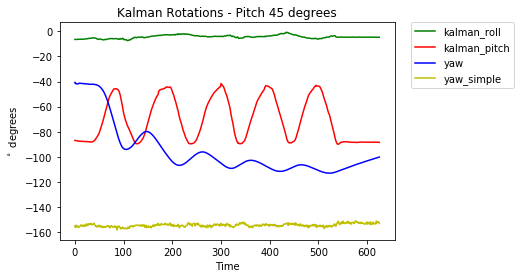

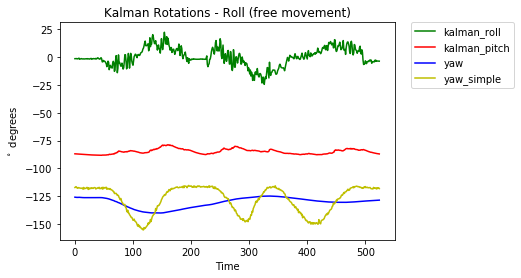

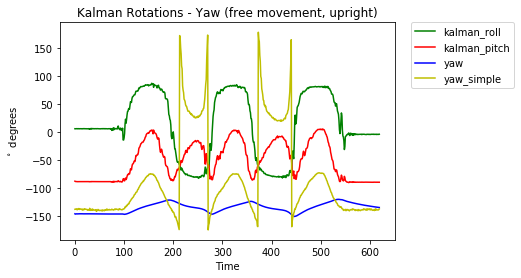

In [22]:
df = vals_df

fig, ax = plt.subplots()
ax.plot(df['ts'], df['kalman_roll'], color='g', label='kalman_roll')
ax.plot(df['ts'], df['kalman_pitch'], color='r', label='kalman_pitch')
ax.plot(df['ts'], df['yaw'], color='b', label='yaw')
ax.plot(df['ts'], df['yaw_simple'], color='y', label='yaw_simple')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Time')
ax.set_ylabel('$^\circ$ degrees')
plt.title('Kalman Rotations - Pitch 45 degrees')
plt.show(fig)

df = nvals_df

fig, ax = plt.subplots()
ax.plot(df['ts'], df['kalman_roll'], color='g', label='kalman_roll')
ax.plot(df['ts'], df['kalman_pitch'], color='r', label='kalman_pitch')
ax.plot(df['ts'], df['yaw'], color='b', label='yaw')
ax.plot(df['ts'], df['yaw_simple'], color='y', label='yaw_simple')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Time')
ax.set_ylabel('$^\circ$ degrees')
plt.title('Kalman Rotations - Roll (free movement)')
plt.show(fig)

df = yvals_df

fig, ax = plt.subplots()
ax.plot(df['ts'], df['kalman_roll'], color='g', label='kalman_roll')
ax.plot(df['ts'], df['kalman_pitch'], color='r', label='kalman_pitch')
ax.plot(df['ts'], df['yaw'], color='b', label='yaw')
ax.plot(df['ts'], df['yaw_simple'], color='y', label='yaw_simple')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Time')
ax.set_ylabel('$^\circ$ degrees')
plt.title('Kalman Rotations - Yaw (free movement, upright)')
plt.show()

In [35]:
import matplotlib.pyplot as plt
from prop_defs import angles_comp, transform_units, kalman_filter, mag_yaw

file = t6n
    
df = pd.DataFrame(file)
df.columns = ['mag_x', 'mag_y', 'mag_z', 'temp', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'vib_ind', 'ts']

# Apply calibrations and sensitivity
pdf = transform_units(df, 0,0,0) # acc, gyr, mag calibrated

# Compute euler angles
cdf = angles_comp(pdf, 50) # 50 Hz
cdf['ts'] = cdf.index

# Kalman filter
kdf = kalman_filter(cdf, 1, 50) # vibration on, 50 Hz

# Tilt-compensated yaw computation with magnetometer
vals_df = mag_yaw(kdf, pdf) # kalman results, data with magnetometer values
vals_df['ts'] = vals_df.index # time index

# View dataframe
t6nvals_df = pd.merge(vals_df, cdf[['acc_angle_z', 'ts']], how = 'inner', on = 'ts') # Optional step, add tilt angle

In [24]:
def plot_2d_brushing(df):

    fig2d, ax2 = plt.subplots()
    ax2.scatter(df['kalman_roll'], -df['kalman_pitch'], c=df['ts'], cmap='Vega20') # x-start: 0, y-start: -90
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    plt.title('2d view movement - XYZ Orientation')
    plt.show(ax2)

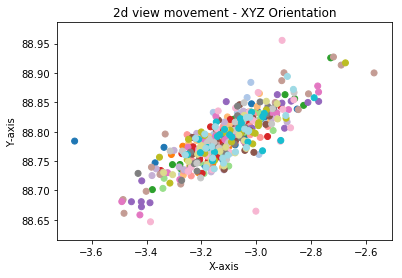

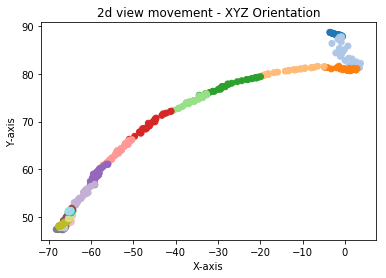

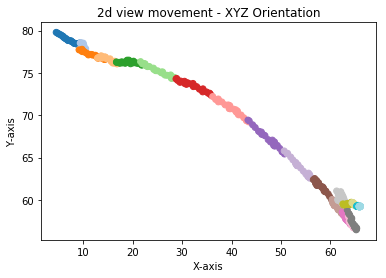

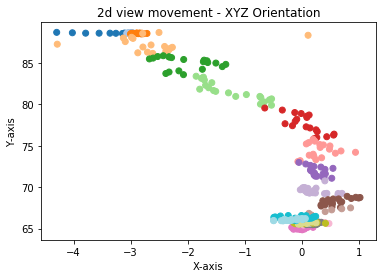

(None, None, None, None)

In [36]:
# Standing still with vibration, no vibrate: slide left, slide right, move forward
plot_2d_brushing(t1nvals_df), plot_2d_brushing(t4vals_df), plot_2d_brushing(t5vals_df), plot_2d_brushing(t6nvals_df)

In [26]:
def plot_3d_brushing(df):

    fig3d = plt.figure()
    ax = Axes3D(fig3d)
    
    # get limits 
    xlim = [min(df.kalman_roll), max(df.kalman_roll)]
    ylim = [min(df.kalman_pitch), max(df.kalman_pitch)]
    zlim = [min(df.yaw), max(df.yaw)]

    t = np.arange(df.shape[0])
    ax.scatter(df['kalman_roll'], df['kalman_pitch'], df['yaw'], c=df['ts'], cmap= 'Vega20')
    m = cm.ScalarMappable(cmap='Vega20')
    m.set_array(df['ts'])
    cbar = plt.colorbar(m)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    plt.title('3d view movement - XYZ Orientation')
    plt.show(ax)

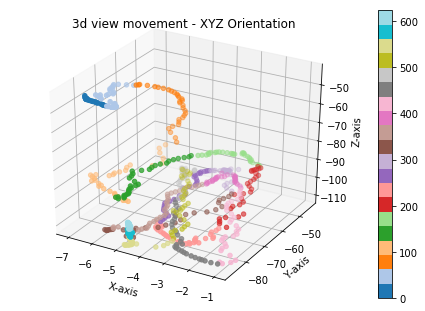

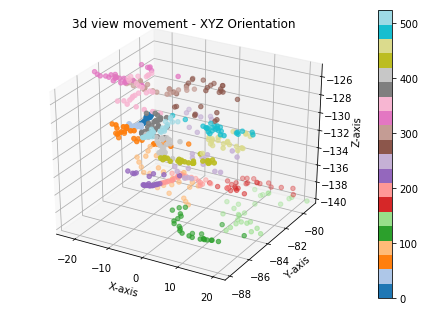

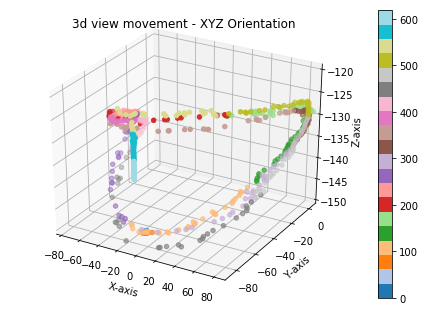

(None, None, None)

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pitch, Roll, Yaw
plot_3d_brushing(vals_df), plot_3d_brushing(nvals_df), plot_3d_brushing(yvals_df)

In [ ]:
# See rotations in more depth
#df = vals_df

##plt.subplots(211)
# plt.plot(df['ts'], df['acc_angle_x'], color='g', label='acc_roll_x')
# plt.plot(df['ts'], df['gyr_roll_x'], color='r', label='gyr_angle_x')
# plt.plot(df['ts'], df['kalman_roll'], color='b', label='kalman_roll')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Time')
# plt.ylabel('$^\circ$ degrees')
# plt.title('X-Axis: Rotation Angles')
# plt.show(fig)

## plt.subplots(212)
# plt.plot(df['ts'], df['acc_angle_y'], color='g', label='acc_angle_y')
# plt.plot(df['ts'], df['gyr_pitch_y'], color='r', label='gyr_angle_y')
# plt.plot(df['ts'], df['kalman_pitch'], color='b', label='kalman_pitch')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Time')
# plt.ylabel('$^\circ$ degrees')
# plt.title('Y-Axis: Rotation Angles')
# plt.show(fig)

## plt.subplots(213)
# plt.plot(df['ts'], df['Xh'], color='r', label='Xh')
# plt.plot(df['ts'], df['Yh'], color='b', label='Yh')
# plt.plot(df['ts'], df['yaw'], color='g', label='yaw')
# plt.plot(df['ts'], df['yaw_simple'], color='y', label='yaw_simple')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlabel('Time - sec')
# plt.ylabel('Z-Axis: Rotation Angles')
# plt.title('Yaw')
# plt.show(fig)